# Social data analysis: Wiki articles
## Author: Ainur Baikara
### In collaboration with Grayson (Wen Guangxue)
### Subject: Social Computing

In [346]:
import pandas as pd
import numpy as np 
import matplotlib as plt
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
sb.set(rc={'figure.figsize':(8,12)})

In [36]:
col_names = ("Article", "rev_id", "page_id", "user", "timestamp")
articles = pd.read_csv("articles.csv")
data_sc = pd.read_csv("data_sc.csv", names = col_names)
data_talk = pd.read_csv("data_talk.csv", names = col_names)

## here are some preprocessing I have made to before analysing the data 

In [37]:
articles.head()

,#,Article,Quality
0,1,Parallel computing,FA
1,2,Manchester Mark 1,FA
2,3,NeXT,FA
3,4,Delrina,FA
4,5,Folding@home,FA


In [38]:
data_sc.head()

,Article,rev_id,page_id,user,timestamp
0,Parallel computing,869792687,22770,Arjayay,2018-11-20T11:45:46Z
1,Parallel computing,869792656,22770,88.98.30.181,2018-11-20T11:45:28Z
2,Parallel computing,869394838,22770,Daiyusha,2018-11-18T09:20:26Z
3,Parallel computing,869380602,22770,2600:8801:983:7000:21D4:4DD3:80E2:3E60,2018-11-18T06:46:03Z
4,Parallel computing,869210492,22770,Jackfork,2018-11-17T03:18:43Z


In [39]:
data_sc.count()

Article      81436
rev_id       81436
page_id      81436
user         81435
timestamp    81436
dtype: int64

In [40]:
data_talk.count()

Article      2352
rev_id       2352
page_id      2352
user         2352
timestamp    2352
dtype: int64

In [41]:
add_data_sc = pd.merge(data_sc, articles[['Article', 'Quality']], on='Article')
add_data_sc.tail()

,Article,rev_id,page_id,user,timestamp,Quality
81431,Numerical control,329692,35607,Christopher Mahan,2002-09-01T18:56:02Z,C
81432,Numerical control,189209,35607,LA2,2002-03-04T15:02:03Z,C
81433,Numerical control,22998,35607,Chris_mahan,2002-03-04T14:56:50Z,C
81434,Numerical control,22992,35607,Conversion script,2002-02-25T15:43:11Z,C
81435,Numerical control,300398,35607,Clasqm,2001-10-21T20:23:33Z,C


In [42]:
add_data_talk = pd.merge(data_talk, articles[['Article', 'Quality']], on='Article')
add_data_talk.tail()

,Article,rev_id,page_id,user,timestamp,Quality
2347,Nomogram,224010916,18320284,ShepBot,2008-07-06T22:46:28Z,C
2348,Non-standard RAID levels,395371595,18320287,John Hill,2010-11-07T16:33:41Z,C
2349,Non-standard RAID levels,224010931,18320287,ShepBot,2008-07-06T22:46:31Z,C
2350,Numerical control,224010942,7323516,ShepBot,2008-07-06T22:46:34Z,C
2351,Numerical control,79892669,7323516,SkerHawx,2006-10-06T18:53:09Z,C


In [43]:
def f(row):
    if row['Quality'] == 'A':
        val = 'Good'
    elif row['Quality'] == 'GA':
        val = 'Good'
    elif row['Quality'] == 'FA':
        val = 'Good'
    else:
        val = 'NotSoGood'
    return val

In [44]:
articles['type'] = articles.apply(f, axis=1)
add_data_talk['article_type'] = add_data_talk.apply(f, axis=1)
add_data_sc['article_type'] = add_data_sc.apply(f, axis=1)

In [45]:
add_data_sc.count()

Article         81436
rev_id          81436
page_id         81436
user            81435
timestamp       81436
Quality         81436
article_type    81436
dtype: int64

In [46]:
sl1 = pd.DataFrame(add_data_sc.loc[add_data_sc['article_type'] == 'Good'])
sl2 = pd.DataFrame(add_data_sc.loc[add_data_sc['article_type'] == 'NotSoGood'])
print(sl1.count())
print(sl2.count())

Article         39165
rev_id          39165
page_id         39165
user            39164
timestamp       39165
Quality         39165
article_type    39165
dtype: int64
Article         42271
rev_id          42271
page_id         42271
user            42271
timestamp       42271
Quality         42271
article_type    42271
dtype: int64


In [47]:
sl1 = pd.DataFrame(sl1.user).drop_duplicates()
sl2 = pd.DataFrame(sl2.user).drop_duplicates()
print(sl1.count())
print(sl2.count())

user    13103
dtype: int64
user    4033
dtype: int64


I have got two dataframes: 
* articles revision data
* talk revision data
Total number of unique editors for articles revision dataset follows: 
* Good articles: 13103 unique editors out of 39165 possible which is about 34 per cent 
* NotSoGood articles: 4033 unique editors out of 42271 possible which is about 9.5 per cent
This 

In [16]:
add_data_sc.head()

,Article,rev_id,page_id,user,timestamp,Quality,article_type
0,Parallel computing,869792687,22770,Arjayay,2018-11-20T11:45:46Z,FA,Good
1,Parallel computing,869792656,22770,88.98.30.181,2018-11-20T11:45:28Z,FA,Good
2,Parallel computing,869394838,22770,Daiyusha,2018-11-18T09:20:26Z,FA,Good
3,Parallel computing,869380602,22770,2600:8801:983:7000:21D4:4DD3:80E2:3E60,2018-11-18T06:46:03Z,FA,Good
4,Parallel computing,869210492,22770,Jackfork,2018-11-17T03:18:43Z,FA,Good


In [110]:
sc_good = add_data_sc[add_data_sc.article_type == 'Good']
sc_bad = add_data_sc[add_data_sc.article_type == 'NotSoGood']

In [111]:
talk_good = add_data_talk[add_data_talk.article_type == 'Good']
talk_bad = add_data_talk[add_data_talk.article_type == 'NotSoGood']

In [183]:
# sc_good.to_csv('article_good.csv')
# sc_bad.to_csv('article_bad.csv')
# talk_good.to_csv('talk_good.csv')
# talk_bad.to_csv('talk_bad.csv')

# Task 1: Total number of unique editors
## My Hypothesis: 
* I guess the total number of editors would be higer for Good article, while I can get the less number of editors for not so good articles. I am making this hypothesis because I believe that the more unique users collaborate in the article the better the quality. 

In [254]:
task1_good = sc_good.groupby(['Article']).agg({'user': ['nunique']})
task1_good.describe()

,user
,nunique
count,152.000000
mean,148.223684
std,376.060623
min,4.000000
25%,13.000000
50%,46.000000
75%,99.000000
max,2817.000000


In [255]:
task1_bad = sc_bad.groupby(['Article']).agg({'user': ['nunique']})
task1_bad.describe()

,user
,nunique
count,250.000000
mean,93.548000
std,26.368254
min,67.000000
25%,82.000000
50%,90.000000
75%,98.000000
max,385.000000


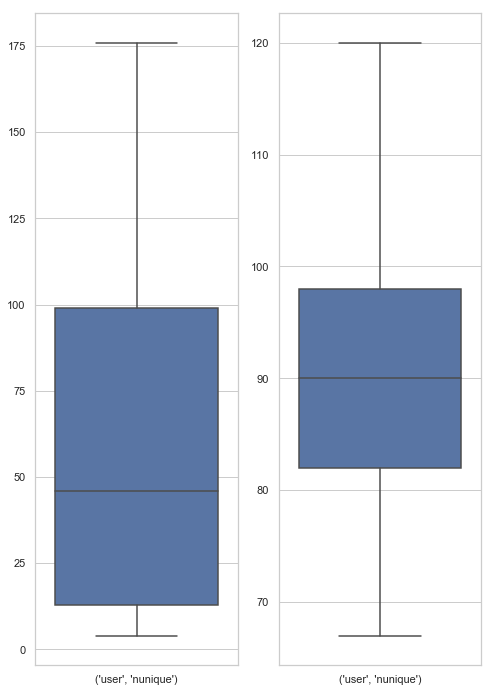

In [256]:
# tt = list(tt['user'])
# tt_bad = list(tt_bad['user'])
# full = [tt, tt_bad]
# full = map(int, full)
f, axes = plt.subplots(1, 2)
sb.set(style="whitegrid")
# ax = sb.boxplot(y=tt, showfliers=False)
sb.boxplot( data=task1_good_sc,   ax=axes[0], showfliers=False)
# sb.stripplot(data=tt, color="orange", ax=axes[0], jitter=0.2, size=2.5, showfliers=False, dodge = False )
sb.boxplot( data=task1_bad_sc,  ax=axes[1], showfliers = False)
# sb.stripplot(data=tt, color="orange", ax=axes[1], jitter=0.2, size=2.5)
# sb.despine(offset=10, trim=True)
plt.show()

Something to say here 

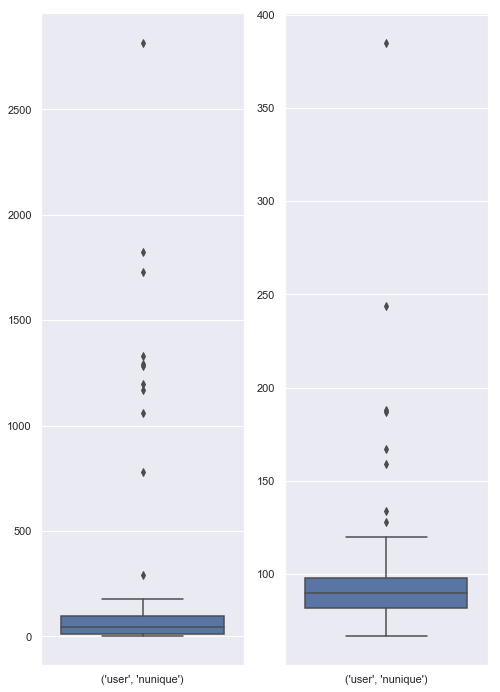

In [347]:
f, axes = plt.subplots(1, 2)
sb.set(style="whitegrid")
sb.boxplot( data=task1_good_sc,   ax=axes[0])
sb.boxplot( data=task1_bad_sc,  ax=axes[1])

I wanted to check the outliers of those dataframes: 

In [351]:
task1_good1 = sc_good.groupby('Article').agg('user').describe()['unique']
task1_good1.sort_values(ascending = False)
task1_good1[task1_good1>200]

Article
4chan                                    1167
Acid2                                     779
Delrina                                  1294
Folding@home                             1332
Macintosh Classic                        1060
Manchester Baby                          2817
Manchester Mark 1                        1283
Microsoft Security Essentials            1197
NeXT                                     1727
Parallel computing                       1824
Rise of Nations: Thrones and Patriots     291
Name: unique, dtype: object

In [352]:
task1_bad1 = sc_bad.groupby('Article').agg('user').describe()['unique']
task1_bad1.sort_values(ascending = False).head(10)
task1_bad1[task1_bad1>120]

Article
Aakash (tablet)                167
Digital signal                 385
Flynn's taxonomy               159
Free software                  188
IEEE 802.11                    134
Natural language processing    244
Nomogram                       128
Outline of computing           187
Name: unique, dtype: object

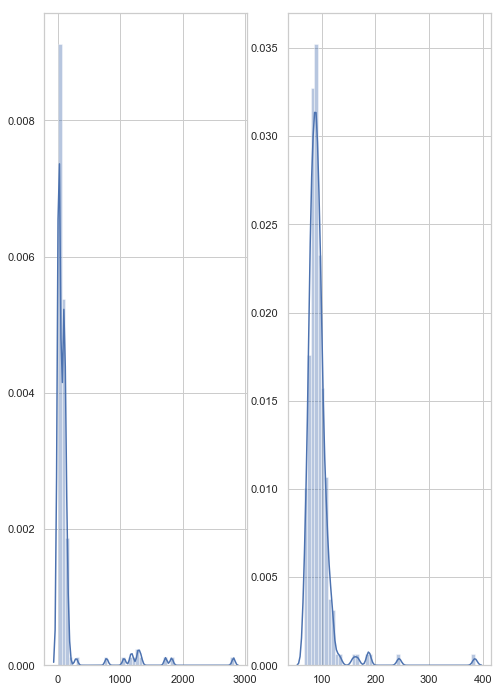

In [353]:
f, axes = plt.subplots(1, 2)
sb.set(style="whitegrid")
sb.distplot(task1_good, ax=axes[0])
sb.distplot(task1_bad, ax=axes[1])

Here are some observations: 

* outliers in the good article have crazy number of contributors. So I have got the question:
* I have some assumptions about those outliers:  

- the outliers in the Good articles have a lot of contributors as those articles were mostly the first in their kinds: what I mean is that  Manchester Baby was the world's first electronic stored-program computer that must have been 'hot' topic and a lot of people wanted to contribute 

- could be also because of the analymous contributos who might be chaging their ip addresses


# Task 2: Number of edits per editors
## My Hypothesis: 
* the more the number of edits the better the quality of the article. Because if the user wants to improve his/her contribution why will probably come back and edit the page again or they might want fix their mistakes
* good articles tend to have more edits as there are a lot  of people who care about the certain article 

In [ ]:
sc_good = add_data_sc[add_data_sc.article_type == 'Good']
sc_bad = add_data_sc[add_data_sc.article_type == 'NotSoGood']

In [401]:
task2_good = sc_good.groupby(['Article','user']).agg({'rev_id': ['nunique']})
task2_good.describe()

,rev_id
,nunique
count,22530.000000
mean,1.738304
std,3.230359
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,162.000000


In [409]:
task2_good

rev_id
                              nunique
Article user                         
4chan   #NAME?                      1
        1.36.143.145                1
        1007D                       1
        103.250.134.31              1
        103.255.7.39                1
        103.48.57.136               1
        104.166.240.51              1
        106.66.124.119              1
        107.2.155.243               1
        107.3.174.179               1
        107.4.215.198               1
        107.77.210.166              1
        108.12.37.76                2
        108.12.80.210               1
        108.14.184.103              1
        108.171.128.180             1
        108.4.111.20                1
        108.41.118.240              2
        110.138.64.91               1
        110.149.154.152             1
        110.36.147.226              1
        110.39.189.162              1
        111.92.7.228                1
        112.134.210.11              1
        112.135.5.163               1
        112.211.110.222             1
        114.174.149.194             1
        117.192.143.72              1
        117.201.95.103              1
        118.208.192.105             1
...                               ...
Zenbook LucienBOT                   1
        Luckas-bot                  1
        Ludde23                    11
        Makecat-bot                 1
        Mav                         2
        MystBot                     1
        Numbo3-bot                  1
        OKBot                       1
        Peters01                    4
        PipepBot                    1
        Polbot                      1
        PrimeHunter                 1
        Rhion                       1
        Rich Farmbrough             1
        Robbot                      3
        Roy1991                     1
        SashatoBot                  1
        Seth Ilys                   1
        SieBot                      3
        Skoglund                    3
        TXiKiBoT                    9
        Thijs!bot                   4
        Tsja                        1
        TuvicBot                    2
        Ugur Basak Bot~enwiki       1
        Underbar dk                 1
        Visviva                     1
        VolkovBot                   1
        XVlom                       1
        YurikBot                    1

[22530 rows x 1 columns]

In [402]:
task2_bad = sc_bad.groupby(['Article', 'user']).agg({'rev_id': ['nunique']})
task2_bad.describe()

,rev_id
,nunique
count,23387.000000
mean,1.807457
std,1.980297
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,44.000000


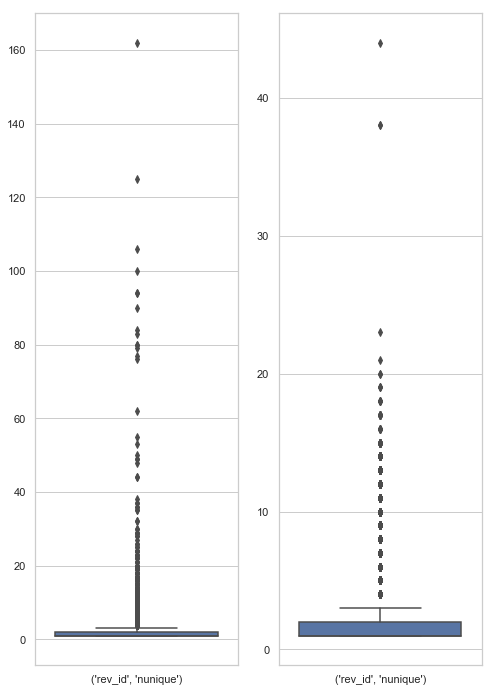

In [408]:
f, axes = plt.subplots(1, 2)
sb.set(style="whitegrid")
sb.boxplot( data=task2_good,   ax=axes[0])
sb.boxplot( data=task2_bad,  ax=axes[1])


### The boxplot on the left represent the "Good" article, and the boxpplot on the right represent the NotSoGood article. 

| ... | Good articles | NotSoGoodArticles |
| --- | --- | --- |
| Median | 45 | 90 |
| Standard deviation | 376 | 26 |
 
 Good articles have higher standard devition which make them less predictable. 
 I am presenting those boxplots without considering the outliers; I have added them in the next step

In [ ]:
task2_good1 = sc_good.groupby('Article').agg('user').describe()['unique']
task2_good1.sort_values(ascending = False)
task2_good1[task2_good1>200]

In [ ]:
task2_bad1 = sc_bad.groupby('Article').agg('user').describe()['unique']
task2_bad1.sort_values(ascending = False).head(10)
task2_bad1[task2_bad1>120]

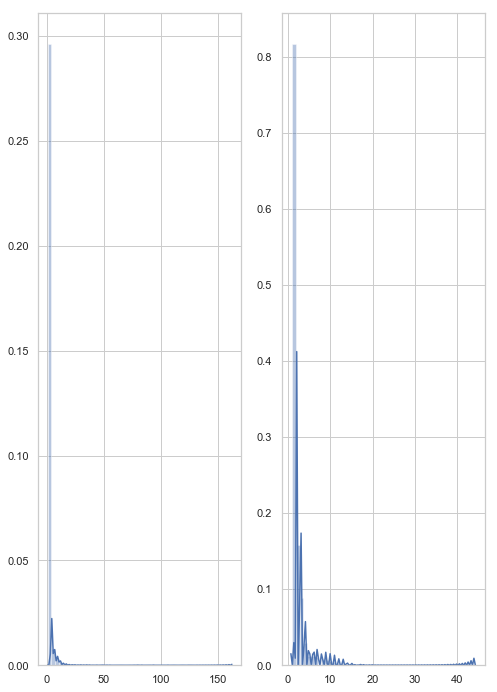

In [410]:
f, axes = plt.subplots(1, 2)
sb.set(style="whitegrid")
sb.distplot(task2_good, ax=axes[0])
sb.distplot(task2_bad, ax=axes[1])

Discussion: 

# Task 3: Number of talk-page posts
## My Hypothesis: 
* total number of unique editors for good articles would be less than for NotSoGood articles, because I think that a lot 

In [412]:
talk_bad.head()

,Article,rev_id,page_id,user,timestamp,Quality,article_type
1637,ACM SIGHPC,767714637,18319938,Johnsoniensis,2017-02-27T14:56:27Z,C,NotSoGood
1638,ACM SIGHPC,224007826,18319938,ShepBot,2008-07-06T22:32:40Z,C,NotSoGood
1639,ACM SIGOPS,767728421,18319940,Johnsoniensis,2017-02-27T16:33:35Z,C,NotSoGood
1640,ACM SIGOPS,224007836,18319940,ShepBot,2008-07-06T22:32:43Z,C,NotSoGood
1641,Alan Kay,767735440,18319942,Johnsoniensis,2017-02-27T17:21:23Z,C,NotSoGood


In [ ]:
task3_good = talk_good.groupby(['Article']).agg({'rev_id': ['count']})
task3_good.describe()

In [ ]:
task3_bad = talk_bad.groupby(['Article']).agg({'rev_id': ['count']})
task3_bad.describe()

In [ ]:
f, axes = plt.subplots(1, 2)
sb.set(style="whitegrid")
sb.boxplot( data=task3_good,   ax=axes[0], showfliers=False)
sb.boxplot( data=task3_bad,  ax=axes[1], showfliers = False)
plt.show()

### The boxplot on the left represent the "Good" article, and the boxpplot on the right represent the NotSoGood article. 

| ... | Good articles | NotSoGoodArticles |
| --- | --- | --- |
| Median | 45 | 90 |
| Standard deviation | 376 | 26 |
 
 Good articles have higher standard devition which make them less predictable. 
 I am presenting those boxplots without considering the outliers; I have added them in the next step

In [ ]:
task1_good1 = sc_good.groupby('Article').agg('user').describe()['unique']
task1_good1.sort_values(ascending = False)
task1_good1[task1_good1>200]

In [ ]:
task1_bad1 = sc_bad.groupby('Article').agg('user').describe()['unique']
task1_bad1.sort_values(ascending = False).head(10)
task1_bad1[task1_bad1>120]

In [ ]:
f, axes = plt.subplots(1, 2)
sb.set(style="whitegrid")
sb.distplot(task1_good, ax=axes[0])
sb.distplot(task1_bad, ax=axes[1])

# Task 4: Number of editors posting on talk-pages
## My Hypothesis: 
* total number of unique editors for good articles would be less than for NotSoGood articles, because I think that a lot 
form a hypotheses in connection to article quality; (2) present the comparison between two group of articles using average and standard deviation as well as box plots.

In [174]:
task4_good_talk = talk_good.groupby(['Article']).agg({'user': ['count']})
task4_good_talk.describe()

sc_good = add_data_sc[add_data_sc.article_type == 'Good']
sc_bad = add_data_sc[add_data_sc.article_type == 'NotSoGood']
task1_good = sc_good.groupby(['Article','user']).agg({'rev_id': ['nunique']})
task1_good.describe()

,user
,count
count,152.000000
mean,10.769737
std,35.204318
min,2.000000
25%,2.000000
50%,2.000000
75%,3.000000
max,265.000000


In [179]:
task1_bad = sc_bad.groupby(['Article']).agg({'user': ['nunique']})
task1_bad.describe()

,Article,rev_id,page_id,user,timestamp,Quality,article_type
0,Parallel computing,850357480,22173,WOSlinker,2018-07-15T11:19:09Z,FA,Good
1,Parallel computing,844288857,22173,Arthur Rubin (alternate),2018-06-03T23:33:14Z,FA,Good
2,Parallel computing,807179335,22173,Arkansalty,2017-10-26T11:59:51Z,FA,Good
3,Parallel computing,791405619,22173,JFG,2017-07-20T01:58:52Z,FA,Good
4,Parallel computing,791405528,22173,JFG,2017-07-20T01:58:00Z,FA,Good
5,Parallel computing,791398051,22173,Certes,2017-07-20T00:32:10Z,FA,Good
6,Parallel computing,791392318,22173,S≈Çawomir Bia≈Çy,2017-07-19T23:55:49Z,FA,Good
7,Parallel computing,791389948,22173,Volunteer1234,2017-07-19T23:33:40Z,FA,Good
8,Parallel computing,785782581,22173,Certes,2017-06-15T11:39:59Z,FA,Good
9,Parallel computing,781500946,22173,Certes,2017-05-21T16:33:39Z,FA,Good


In [180]:
f, axes = plt.subplots(1, 2)
sb.set(style="whitegrid")
sb.boxplot( data=task1_good_sc,   ax=axes[0], showfliers=False)
sb.boxplot( data=task1_bad_sc,  ax=axes[1], showfliers = False)
plt.show()

,Article,rev_id,page_id,user,timestamp,Quality,article_type
1637,ACM SIGHPC,767714637,18319938,Johnsoniensis,2017-02-27T14:56:27Z,C,NotSoGood
1638,ACM SIGHPC,224007826,18319938,ShepBot,2008-07-06T22:32:40Z,C,NotSoGood
1639,ACM SIGOPS,767728421,18319940,Johnsoniensis,2017-02-27T16:33:35Z,C,NotSoGood
1640,ACM SIGOPS,224007836,18319940,ShepBot,2008-07-06T22:32:43Z,C,NotSoGood
1641,Alan Kay,767735440,18319942,Johnsoniensis,2017-02-27T17:21:23Z,C,NotSoGood
1642,Alan Kay,224007848,18319942,ShepBot,2008-07-06T22:32:47Z,C,NotSoGood
1643,Automata theory,767858834,18319943,Johnsoniensis,2017-02-28T10:35:07Z,C,NotSoGood
1644,Automata theory,224007857,18319943,ShepBot,2008-07-06T22:32:50Z,C,NotSoGood
1645,Bit,767900831,18319945,Johnsoniensis,2017-02-28T16:36:04Z,C,NotSoGood
1646,Bit,224007873,18319945,ShepBot,2008-07-06T22:32:53Z,C,NotSoGood


### The boxplot on the left represent the "Good" article, and the boxpplot on the right represent the NotSoGood article. 

| ... | Good articles | NotSoGoodArticles |
| --- | --- | --- |
| Median | 45 | 90 |
| Standard deviation | 376 | 26 |
 
 Good articles have higher standard devition which make them less predictable. 
 I am presenting those boxplots without considering the outliers; I have added them in the next step

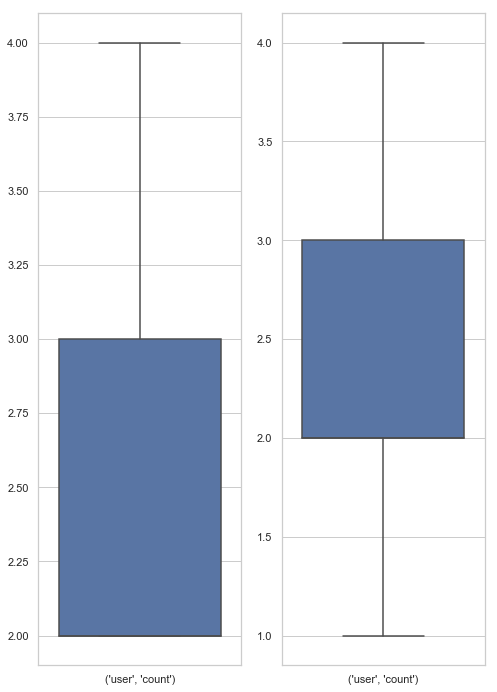

In [177]:
task1_good1 = sc_good.groupby('Article').agg('user').describe()['unique']
task1_good1.sort_values(ascending = False)
task1_good1[task1_good1>200]

In [ ]:
task1_bad1 = sc_bad.groupby('Article').agg('user').describe()['unique']
task1_bad1.sort_values(ascending = False).head(10)
task1_bad1[task1_bad1>120]

In [ ]:
f, axes = plt.subplots(1, 2)
sb.set(style="whitegrid")
sb.distplot(task1_good, ax=axes[0])
sb.distplot(task1_bad, ax=axes[1])

# Task 5: Frequency of edits (time between edits)
## My Hypothesis: 
* the lower the frequency the lower the quality 

In [368]:
sc_good.head()

,Article,rev_id,page_id,user,timestamp,Quality,article_type
0,Parallel computing,869792687,22770,Arjayay,2018-11-20T11:45:46Z,FA,Good
1,Parallel computing,869792656,22770,88.98.30.181,2018-11-20T11:45:28Z,FA,Good
2,Parallel computing,869394838,22770,Daiyusha,2018-11-18T09:20:26Z,FA,Good
3,Parallel computing,869380602,22770,2600:8801:983:7000:21D4:4DD3:80E2:3E60,2018-11-18T06:46:03Z,FA,Good
4,Parallel computing,869210492,22770,Jackfork,2018-11-17T03:18:43Z,FA,Good


In [356]:
sc_bad.head()

,Article,rev_id,page_id,user,timestamp,Quality,article_type
39165,ACM SIGHPC,865335155,35483,82.19.214.105,2018-10-23T08:25:16Z,C,NotSoGood
39166,ACM SIGHPC,840607020,35483,Certes,2018-05-10T23:14:29Z,C,NotSoGood
39167,ACM SIGHPC,824408972,35483,2405:204:A02B:DF9B:9D3D:8121:CE8D:20A1,2018-02-07T04:05:31Z,C,NotSoGood
39168,ACM SIGHPC,823252418,35483,Timmyshin,2018-01-31T03:42:53Z,C,NotSoGood
39169,ACM SIGHPC,805567256,35483,Lds,2017-10-16T06:25:49Z,C,NotSoGood


In [374]:
task5_good = pd.DataFrame(sc_good.groupby('Article').agg('timestamp').unique())
# task5_good

In [390]:
def measure_freq(article_name):
    tt = task5_good.loc[article_name]
    tt.loc['timestamp']
    task5 = pd.Series([pd.Timestamp(i) for i in tt.loc['timestamp']])
    task5 = task5.sort_values()
    return task5.diff().astype('timedelta64[s]').mean()

In [392]:
task5_new = pd.DataFrame([{"Article": row.name, 'N': measure_freq(row.name)} for index, row  in task5_good.iterrows()])
task5_new

,Article,N
0,4chan,2.451807e+05
1,AACS encryption key controversy,1.895115e+07
2,AVG PC TuneUp,6.864113e+06
3,Acid2,3.684713e+05
4,Alan Kotok,5.924646e+06
5,Alan Turing,4.292272e+06
6,Allocator (C++),8.145039e+06
7,Anonymous (group),1.098173e+07
8,Apple Inc. litigation,9.181976e+06
9,Apple TV,9.545517e+06


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a40fe6470>]],
      dtype=object)

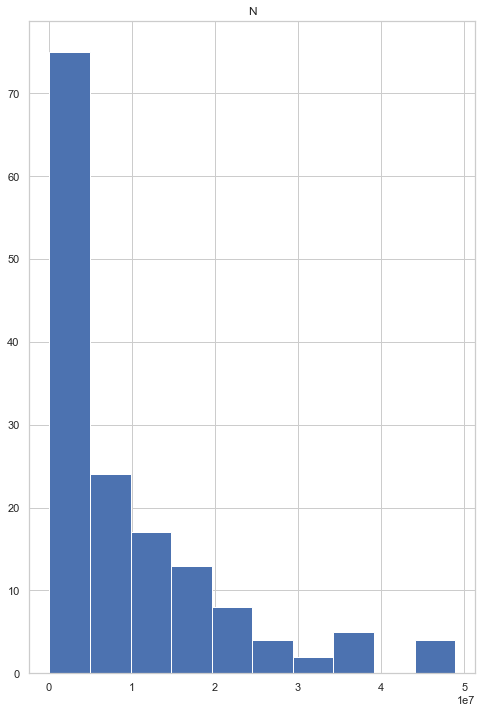

In [394]:
task5_new.hist(column='N')

In [398]:
task5_bad = pd.DataFrame(sc_bad.groupby('Article').agg('timestamp').unique())
def measure_freq(article_name):
    tt = task5_bad.loc[article_name]
    tt.loc['timestamp']
    task5 = pd.Series([pd.Timestamp(i) for i in tt.loc['timestamp']])
    task5 = task5.sort_values()
    return task5.diff().astype('timedelta64[s]').mean()
task5_new_bad = pd.DataFrame([{"Article": row.name, 'N': measure_freq(row.name)} for index, row  in task5_bad.iterrows()])
task5_new_bad.head()

,Article,N
0,2016 Dyn cyberattack,3.167014e+06
1,3dfx Interactive,2.396185e+06
2,64-bit computing,2.798104e+06
3,ACM SIGHPC,3.244638e+06
4,ACM SIGOPS,3.277835e+06


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a41494470>]],
      dtype=object)

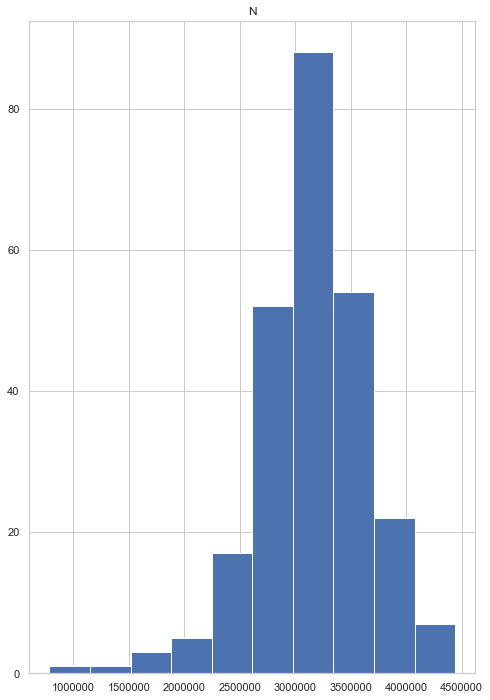

In [399]:
task5_new_bad.hist(column='N')

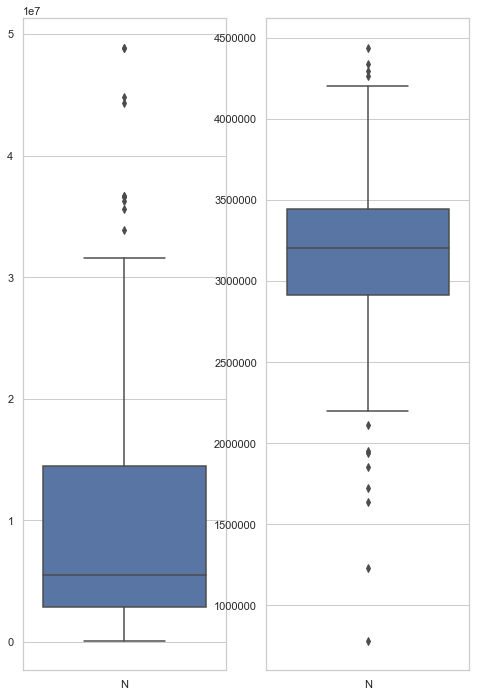

In [400]:
f, axes = plt.subplots(1, 2)
sb.set(style="whitegrid")
sb.boxplot( data=task5_new,   ax=axes[0])
sb.boxplot( data=task5_new_bad,  ax=axes[1])